# Graphing and Analyzing Audio Features 

## Importing Needed Modules 

In [1]:
#Using this kaggle based site: https://www.kaggle.com/ilyamich/mfcc-implementation-and-tutorial
#https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d & 
#https://medium.com/analytics-vidhya/deep-learning-audio-classification-fcbed546a2dd
import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

!pip install librosa

import wave, math, contextlib
import librosa
import librosa.display
import speech_recognition as sr
from moviepy.editor import AudioFileClip

Defaulting to user installation because normal site-packages is not writeable


## Reading in wav file and displaying audio features

In [2]:
#if this wanted to use all the of the given audio files (assumption that mp4 has already been converted to wav files)
#a large function could be defined that takes in as input an array of file names (produced by for loop)
#this file should be located in the same directory as this .ipynb file
transcribed_audio_file_name = "10.mp4_transcribed.wav"

#reading the generated wav audio file and determing the frequency of sampling
sample_rate, audio = wavfile.read(transcribed_audio_file_name)
print("Sample rate: {0}Hz".format(sample_rate))
print("Audio duration: {0}s".format(len(audio) / sample_rate))


Sample rate: 44100Hz
Audio duration: 41.57s


### Displaying the waveform

Text(0.5, 1.0, 'Waveform')

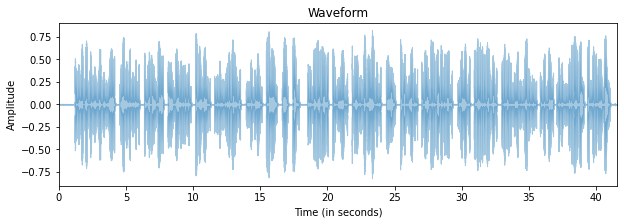

In [3]:
#the waveform of an audio file displays the frequency of amplitude as a function of the duration in time
signal, sample_rate = librosa.load(transcribed_audio_file_name, sr=sample_rate)
plt.figure(figsize=(10,3))
librosa.display.waveplot(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (in seconds)")
plt.ylabel("Amplitude")
plt.title("Waveform")

### Displaying the spectogram

Text(0.5, 1.0, 'Short Term Fourier Transformation-STFT')

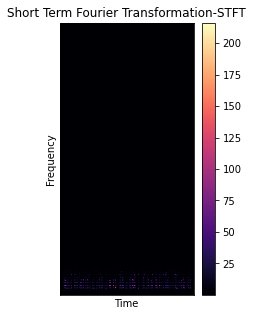

In [5]:
#Short Term Fourier Transform
# a spectogram is like a waveform, but looks at the representation of frequencies as they change with time
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)
# display spectrogram
plt.figure(figsize=(3,5))
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Short Term Fourier Transformation-STFT")

### 

### Displaying Power Spectrum

Text(0.5, 1.0, 'Power spectrum')

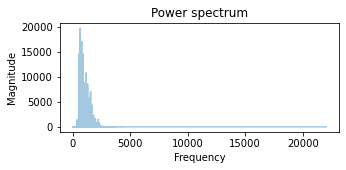

In [6]:
#Power Spectrum
# FFT(Fast Fourier Transformation) -> power spectrum
fft = np.fft.fft(signal)
# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)
# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))
# take half of the spectrum and frequency as it is a mirror image
half_spectrum = spectrum[:int(len(spectrum)/2)]
half_f = f[:int(len(spectrum)/2)]
# plot spectrum
plt.figure(figsize=(5,2))
plt.plot(half_f, half_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

### Displaying MFCC

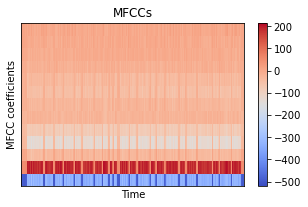

In [7]:
#MFCC
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
# display MFCCs
plt.figure(figsize=(5,3))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
# show the plot
plt.show()

### Comparing MFCC's For Electrolarynx vs Larynx

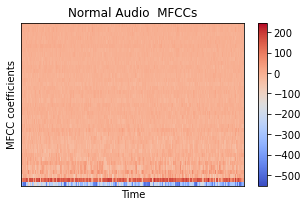

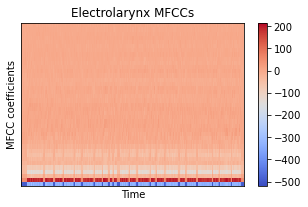

In [14]:
#Normal
#MFCC
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
# MFCCs
# extract 13 MFCCs

#This file should be in the same directory as this code
normal_wav = "transcribed_speech13.wav"
normsignal, normsample_rate = librosa.load(normal_wav, sr=sample_rate)
normMFCCs = librosa.feature.mfcc(normsignal, normsample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=39)
# display MFCCs
plt.figure(figsize=(5,3))
librosa.display.specshow(normMFCCs, sr=normsample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("Normal Audio  MFCCs")
# show the plot
plt.savefig("larynxSpeech.png")
plt.show()


#Electrolarynx
#MFCC
# STFT -> spectrogram
# MFCCs
# extract 13 MFCCs
filtElectro = "10.mp4_transcribed.wav"
filtsignal, filtsample_rate = librosa.load(filtElectro, sr=sample_rate)
filtMFCCs = librosa.feature.mfcc(filtsignal, filtsample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=39)
# display MFCCs
plt.figure(figsize=(5,3))
librosa.display.specshow(filtMFCCs, sr=filtsample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("Electrolarynx MFCCs")
# show the plot
plt.savefig("electoSpeech.png")
plt.show()